In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Fetch the dataset into pandas dataframe:

In [2]:
data = pd.read_csv("data.csv")

<a id="2"></a> 
## Data Exploration and Cleaning

To have a basic understanding of the data, we have to use pandas' `info` method.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

* There are 569 rows and 33 columns in the dataset.
* `id` is an attribute with integer values, `diagnosis` is an object (string) type variable and the rest of the features are float numbers.
* Luckily, there is no `NaN` values, excepting `Unnamed: 32` feature. All of the entries have `NaN` values for this column. So it has to be removed from the dataframe.  

In [4]:
data.drop(['Unnamed: 32'], axis=1, inplace=True)

Now let's take a glimpse of data with the first five entries, by using `head` method.

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


As we can observe from the table above, `id` is a unique value per individual patient.  
It has nothing to do with diagnosis, so we have to eliminate it.

In [6]:
data.drop(['id'], axis=1, inplace=True)

<a id="3"></a> 
## Data Preparation

In [7]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

`diagnosis` is the label (target) of the dataset.  
* `B` indicates Benign  
* `M` indicates Malignant

When it comes to label, we do not prefer working with object-type variables. So let's change them:
* `1` → `M`
* `0` → `B`

In [8]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

Target feature will be held in `y`, and the rest of attributes the will be held in `x`.

In [9]:
y = data.diagnosis.values
x = data.drop(['diagnosis'], axis=1)

Normalizing variables is importing to avoid imbalanced weights during learning. We want all values to be scaled between 0 and 1.

In [10]:
x = (x - np.min(x) ) / ( np.max(x) - np.min(x) ).values

D:\ANACONDA\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
D:\ANACONDA\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
D:\ANACONDA\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


<a id="4"></a> 
## Split Test and Train Variables

We have to split our data to create train and test variables. To do so, we will be using `sklearn`'s `train_test_split method`.  

We set the`test_size` parameter to `0.2`, so the train values will be randomly 80% of the data.  Let's briefly describe what all four values correspond to:
* `x_train` : randomly 80% of data with features of `x` (`radius_mean`, `texture_mean`, etc.)
* `x_test` : randomly 20% (the rest) of data with features of `x`
* `y_train` : randomly 80% of data with feature of `y` (`diagnosis`, the target feature)
* `y_test` : randomly 20% (the rest) of data with feature of `y`  


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [13]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

We need the optimized values of bias and weights so that the algorithm will produce the outputs that are closest to real values.



After the summation part, we get the output ( $\large ý$ ) of our algorithm. We need a **threshold** to check whether the numeric output corresponds to `Malignant` or `Benign`. The **sigmoid function** comes handy here to do so.

<a id="6"></a> <br>
### Sigmoid Function

A sigmoid function is a mathematical function having a characteristic "S"-shaped curve or sigmoid curve. [Source of definition](https://en.wikipedia.org/wiki/Sigmoid_function)  
The formula of the sigmoid function is:

$$\LARGE f(x)=\frac{1}{1+e^{-x}}$$

The figure below is how it looks like:

![sigmoid-function](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)

We will be using sigmoid function as threshold to determine whether output corresponds to 0 or 1. If value is below the threshold (< 0.5) it is going to be considered as 0, otherwise 1.

After checking the output, we rearrange the bias and weights and go back to first step (and keep doing it until their optimized values).  

Let's code our sigmoid function:

In [14]:
def sigmoid(z):
    output = 1/( 1 + np.exp(-z) )
    return output

After defining the sigmoid function, all we have to do is passing our prediction ( $ \large ý$ ) to sigmoid function, and getting the output as 0 or 1. In our case, as we defined before, `0` means Benign and `1` means Malignant.  

Getting the output via sigmoid function is okay, but how can we know how well we predicted it?  
The answer is by using **Loss Functions**.

<a id="7"><br></a>
### Loss Function

Loss function is basicly calculating the difference between predicted value and real value of target feature. But here, we will be using a kind of specialized loss function, which is **log loss (cross entry loss)**.  
Let's examine the formula of log loss function:  

$$\LARGE -( y log(ý) + (1-y)log(1-ý) ) $$

As you can observe from the formula above, if we predict the value as 0, and the real value of label is 0 too (which means we guessed right), then the output of loss function is 0. It is valid for vice versa (both predicted and real values are 1).  
Otherwise if we cannot guess it right, then the output of the function would be so high.  

As a conclusion, *lower the output of loss function, better we predicted the label*.

We measured the error size of one algorithm via loss function.  We have to add all loss function outputs to get the **cost function**.

In [15]:
def forward_backward_propagation(w,b,x_train,y_train):
    y_ = np.dot(w.T,x_train) + b # numeric output of regression algorithm
    y_pre = sigmoid(y_) # binary output of sigmoid function
    loss = -y_train*np.log(y_pre)-(1-y_train)*np.log(1-y_pre) # output of loss function
    cost = (np.sum(loss))/x_train.shape[1] # x_train.shape[1]  is for scaling

<a id="8"><br></a>
### Optimizing Algorithm with Gradient Descent

We measured how well our algorithms can predict via cost function. Now it is time to optimize algorithm's parameters (weights and bias) so that it can learn from data and make better predictions. It will be handled by **gradient descent** method.  

**What is Gradient Descent?**  
Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point. [Source of definition](https://en.wikipedia.org/wiki/Gradient_descent)  

$$\LARGE w := w - \alpha \frac{\partial J(w)}{\partial w} $$

Here $\large J(w)$ is the *cost*, we divide its derivative by $\large w$'s derivative, so we get a numerical result like $\large 0.02$. And then subtract it from the initial weight, and then update our weight with its new value. 

P.S: The $\large \alpha$ is the *learning rate*, determines how fast we learn. It shouldn't be too big (jumps over the optimal point) or too small (may never converge).

Let's take a look at the schema to understand what I mean:

![gradiend_descent](https://cdn-images-1.medium.com/max/1600/0*rBQI7uBhBKE8KT-X.png)  

As you can see from the image above, we are updating our weight iteratively, until it converges to a local minimum. After convergence, the right part of the formula ( $\large \frac{\partial J(w)}{\partial w}$) will keep producing zero, which means weight is at the optimal point, and not about to change anymore.  

In fact, we will be using bias in the formula too, and it's gonna look like this:

$$\LARGE w := w - \alpha \frac{\partial J(w,b)}{\partial (w,b)} $$  

What we did above is called **backward propagation**. Let's implement it with 'forward propagation' in one function:

In [16]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    y_ = np.dot(w.T,x_train) + b # numeric output of regression algorithm
    y_pre = sigmoid(y_) # binary output of sigmoid function
    loss = -y_train*np.log(y_pre)-(1-y_train)*np.log(1-y_pre) # output of loss function
    cost = (np.sum(loss))/x_train.shape[1] # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_pre-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_pre-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

We may call one forward and one backward propagation as one iteration. It can take our algorithm to somewhere, but obviously it wouldn't be enough. So we have to pick an arbitrary number for iteration ($\large n$), and update our algorithm $\large n$ times for learning.  

<a id="9"><br></a>
### Update Function
Let's create a function `update` and use this function to call the methods above to train our algorithm, and give some feedback about costs by printing cost values and visualizing them.

In [17]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

<a id="10"><br></a>
### Predict Method
And it is time to code the `predict` method to create an interface between us and our algorithm.

In [18]:
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

<a id="11"><br></a>
### Coding Logistic Regression
And finally let's put all these things together, i.e, code our custom logistic regression function!

Cost after iteration 0: 0.693953
Cost after iteration 10: 0.497200
Cost after iteration 20: 0.403702
Cost after iteration 30: 0.348852
Cost after iteration 40: 0.312591
Cost after iteration 50: 0.286617
Cost after iteration 60: 0.266939
Cost after iteration 70: 0.251403
Cost after iteration 80: 0.238747
Cost after iteration 90: 0.228182


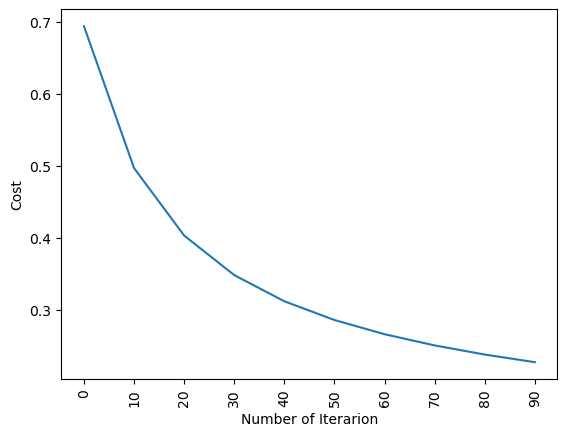

train accuracy: 94.72527472527473 %
test accuracy: 93.85964912280701 %


In [19]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    
    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 100) 

<a id="12"><br></a>
## Conclusions
* Logistic Regression is a good way to classify binary labels, concluded from a lot of numerical features.
* Cost gets smaller as the iteration of update (forward and backward propagation) increases.
* We got an accuracy of `~93.86` on the `test` dataset.